In [2]:
import pandas as pd

# Load the dataset
file_path = '..input/cyberbullying-classification/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [6]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [7]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
clean_text            0
dtype: int64

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


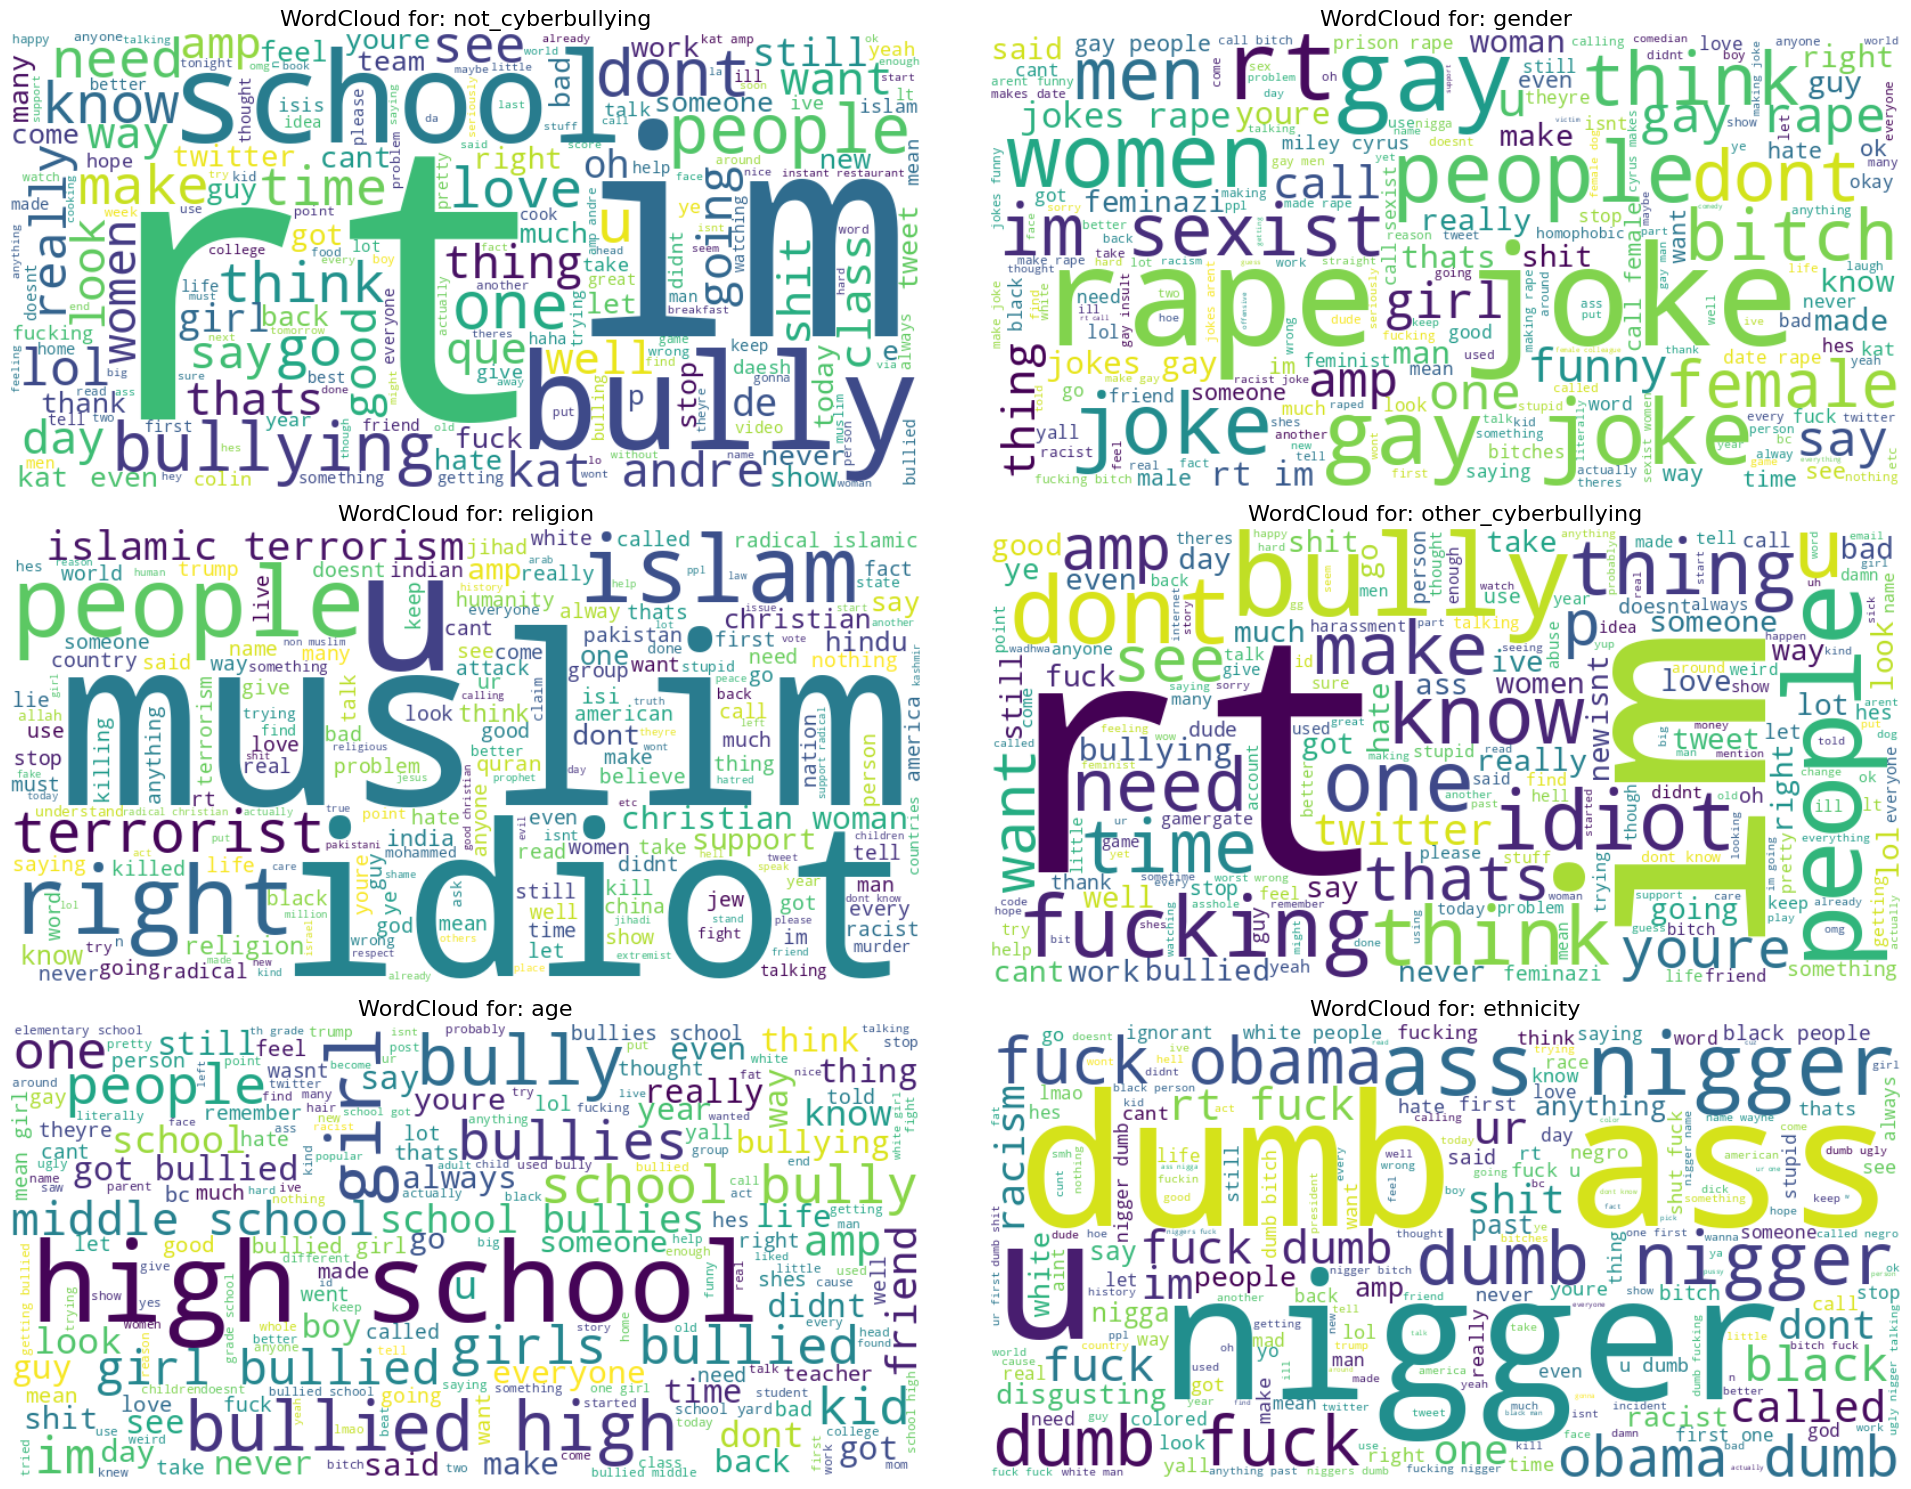

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

# If not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)           # remove mentions
    text = re.sub(r'#\w+', '', text)           # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation and digits
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

# Apply cleaning
df['clean_text'] = df['tweet_text'].astype(str).apply(clean_text)

# Generate and plot WordCloud for each class
classes = df['cyberbullying_type'].unique()

plt.figure(figsize=(20, 15))

for i, label in enumerate(classes):
    text = ' '.join(df[df['cyberbullying_type'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.subplot(3, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for: {label}', fontsize=16)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/di

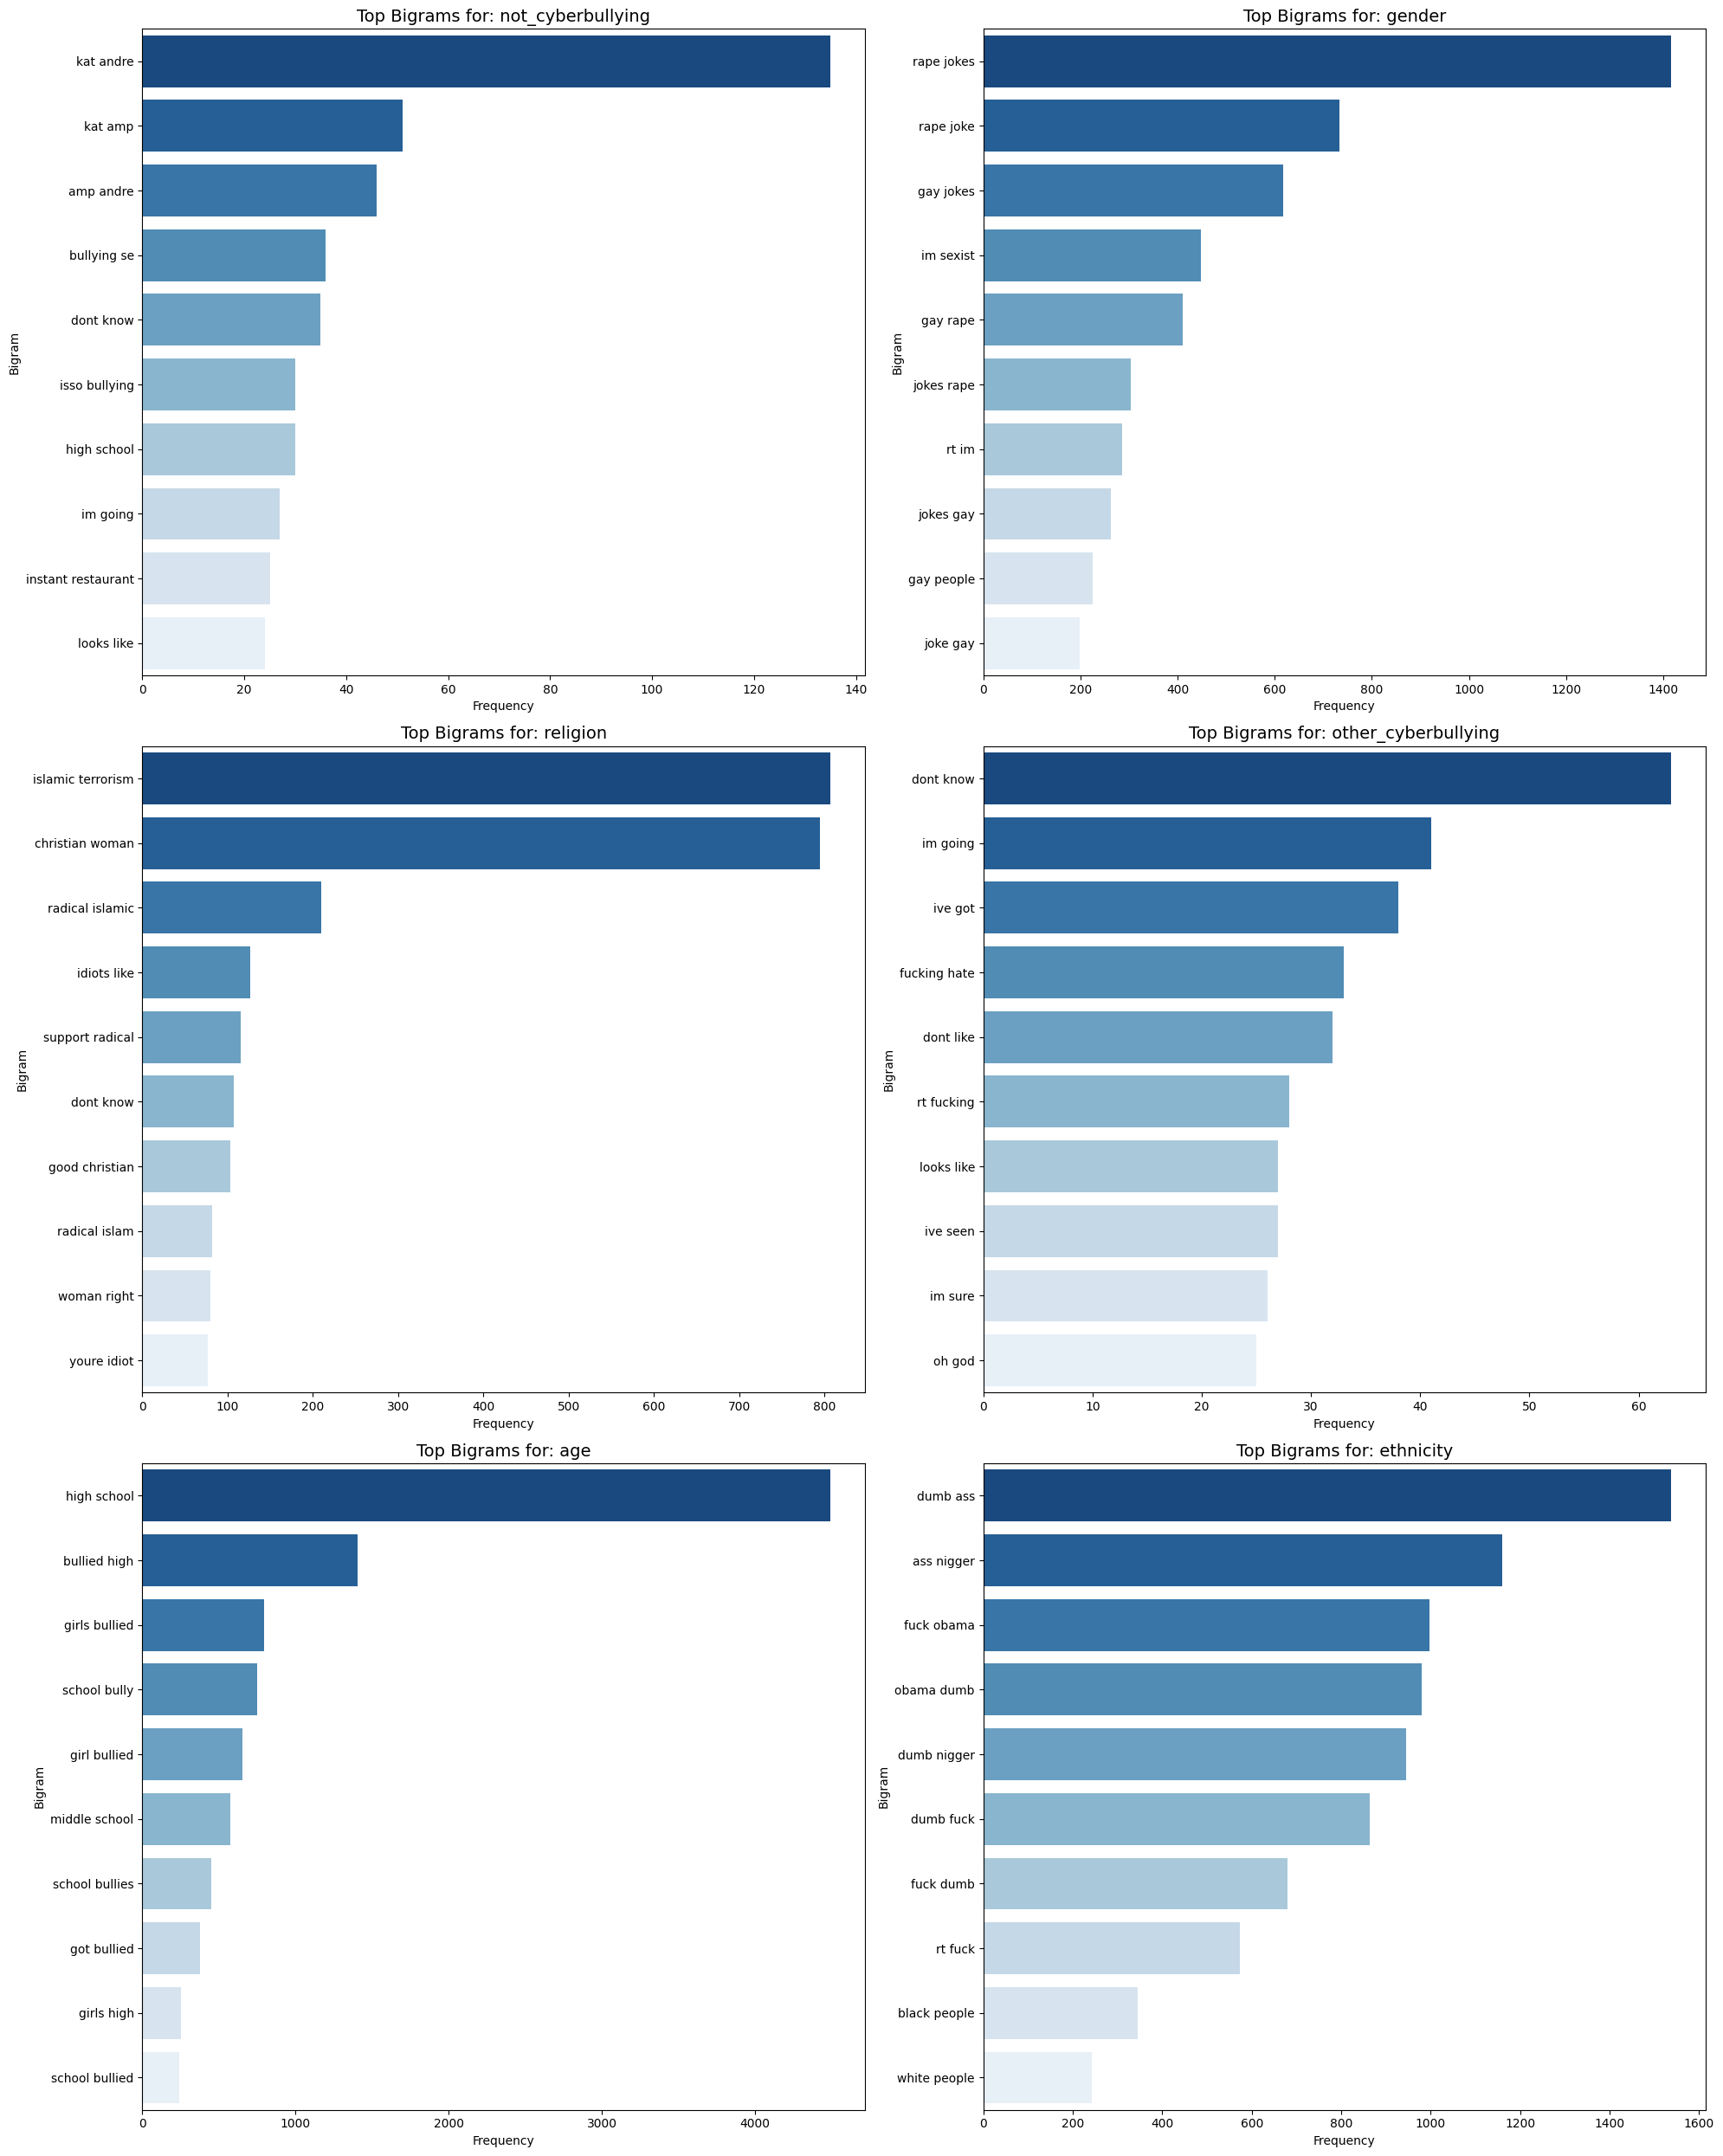

In [11]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get top N bigrams
def get_top_bigrams(texts, n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Unique classes
types = df['cyberbullying_type'].unique()

# Plotting
plt.figure(figsize=(20, 25))
for i, label in enumerate(types):
    plt.subplot(3, 2, i + 1)
    bigrams = get_top_bigrams(df[df['cyberbullying_type'] == label]['clean_text'], n=10)
    bigram_words, counts = zip(*bigrams)
    sns.barplot(x=list(counts), y=list(bigram_words), palette="Blues_r")
    plt.title(f"Top Bigrams for: {label}", fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.tight_layout()

plt.show()


--- Random Forest ---
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1598
          ethnicity       0.99      0.97      0.98      1592
             gender       0.85      0.80      0.83      1595
  not_cyberbullying       0.47      0.46      0.46      1589
other_cyberbullying       0.48      0.56      0.52      1565
           religion       0.96      0.93      0.94      1600

           accuracy                           0.78      9539
          macro avg       0.79      0.78      0.78      9539
       weighted avg       0.79      0.78      0.79      9539



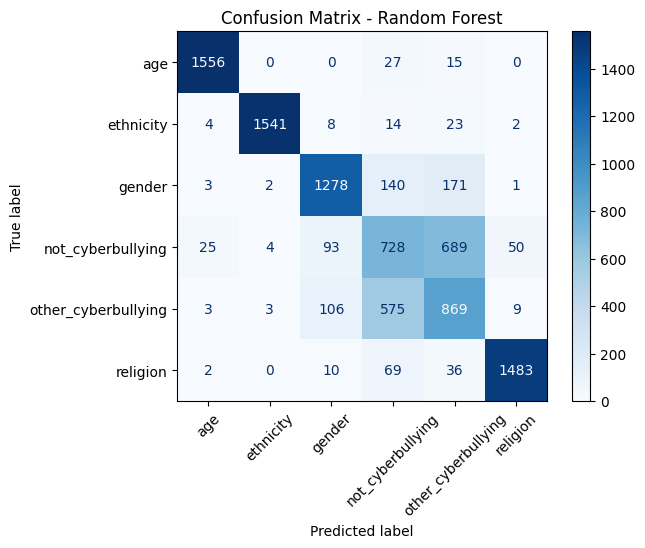


--- XGBoost ---
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1598
          ethnicity       0.99      0.98      0.98      1592
             gender       0.90      0.80      0.84      1595
  not_cyberbullying       0.50      0.61      0.55      1589
other_cyberbullying       0.55      0.54      0.54      1565
           religion       0.97      0.93      0.95      1600

           accuracy                           0.80      9539
          macro avg       0.82      0.80      0.81      9539
       weighted avg       0.82      0.80      0.81      9539



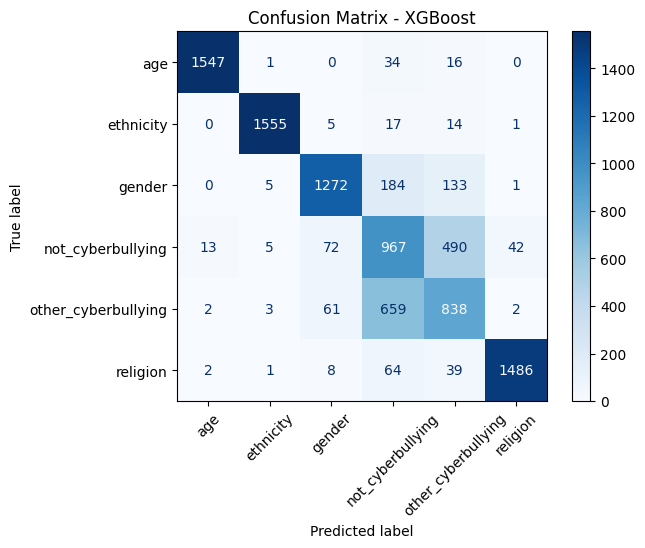


--- Gradient Boosting ---
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1598
          ethnicity       0.99      0.97      0.98      1592
             gender       0.90      0.79      0.84      1595
  not_cyberbullying       0.49      0.67      0.56      1589
other_cyberbullying       0.54      0.46      0.50      1565
           religion       0.97      0.91      0.94      1600

           accuracy                           0.79      9539
          macro avg       0.81      0.79      0.80      9539
       weighted avg       0.81      0.79      0.80      9539



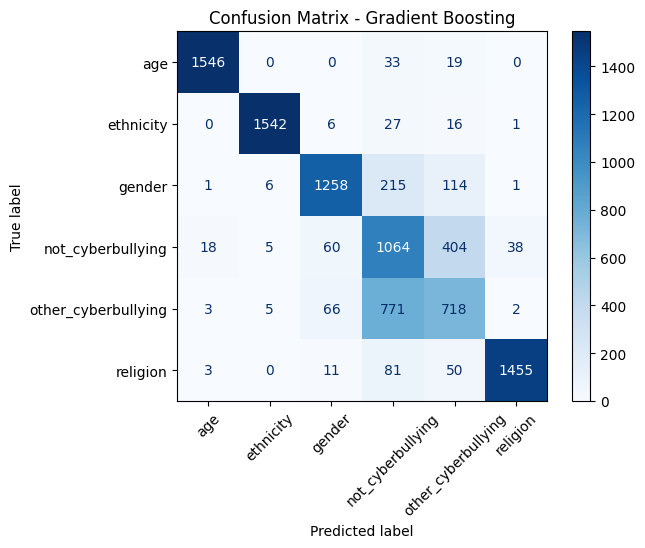

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-16 07:38:29.638442: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
269/269 - 4s - 15ms/step - accuracy: 0.7323 - loss: 0.6704 - val_accuracy: 0.7935 - val_loss: 0.4526
Epoch 2/5
269/269 - 2s - 7ms/step - accuracy: 0.8034 - loss: 0.4516 - val_accuracy: 0.8011 - val_loss: 0.4408
Epoch 3/5
269/269 - 2s - 6ms/step - accuracy: 0.8116 - loss: 0.4250 - val_accuracy: 0.7959 - val_loss: 0.4412
Epoch 4/5
269/269 - 2s - 6ms/step - accuracy: 0.8217 - loss: 0.4008 - val_accuracy: 0.7995 - val_loss: 0.4440
Epoch 5/5
269/269 - 2s - 6ms/step - accuracy: 0.8307 - loss: 0.3816 - val_accuracy: 0.7940 - val_loss: 0.4454
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- ANN ---
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1598
          ethnicity       0.99      0.97      0.98      1592
             gender       0.85      0.82      0.83      1595
  not_cyberbullying       0.49      0.63      0.55      1589
other_cyberbullying       0.55      0.44      0.49      1565
           religion       0.

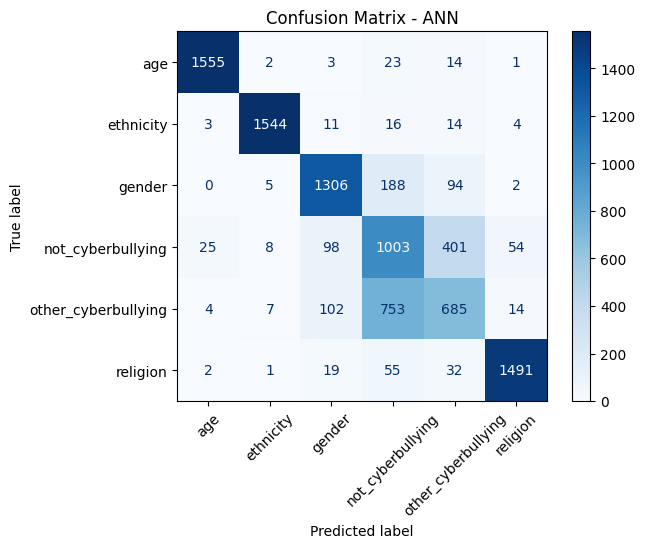

In [10]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Vectorize
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['cyberbullying_type'])

# Class label names
class_names = le.classes_

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluation function
def evaluate_model(model, X_test, y_test, model_name, class_names):
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred, target_names=class_names))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(xticks_rotation=45, cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# 1. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest", class_names)

# 2. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost", class_names)

# 3. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
evaluate_model(gb, X_test, y_test, "Gradient Boosting", class_names)

# 4. ANN (Neural Network)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

ann = Sequential()
ann.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dropout(0.3))
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(len(class_names), activation='softmax'))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_cat, epochs=5, batch_size=128, verbose=2, validation_split=0.1)

# Predict & evaluate ANN
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)
print("\n--- ANN ---")
print(classification_report(y_test, y_pred_ann, target_names=class_names))
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.show()



--- Random Forest (Tuned) ---
                     precision    recall  f1-score   support

                age       0.95      0.98      0.96      1598
          ethnicity       0.98      0.96      0.97      1592
             gender       0.94      0.72      0.82      1595
  not_cyberbullying       0.46      0.66      0.54      1589
other_cyberbullying       0.49      0.39      0.43      1565
           religion       0.94      0.91      0.93      1600

           accuracy                           0.77      9539
          macro avg       0.79      0.77      0.78      9539
       weighted avg       0.79      0.77      0.78      9539



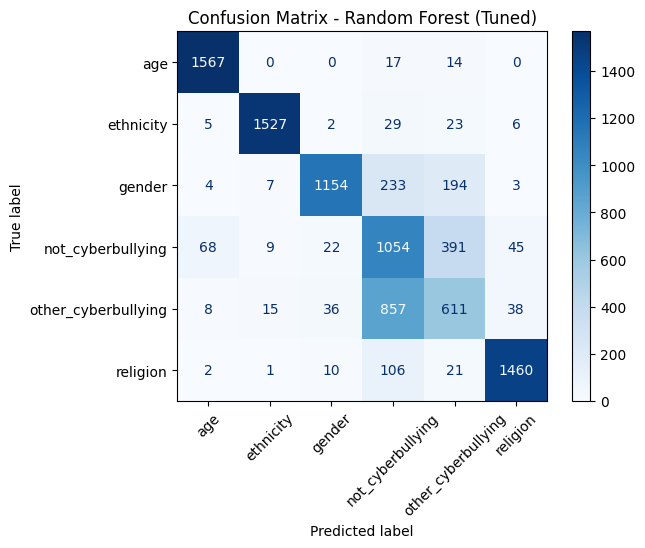


--- XGBoost (Tuned) ---
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1598
          ethnicity       0.99      0.98      0.99      1592
             gender       0.89      0.80      0.85      1595
  not_cyberbullying       0.51      0.61      0.55      1589
other_cyberbullying       0.55      0.54      0.54      1565
           religion       0.97      0.93      0.95      1600

           accuracy                           0.81      9539
          macro avg       0.82      0.80      0.81      9539
       weighted avg       0.82      0.81      0.81      9539



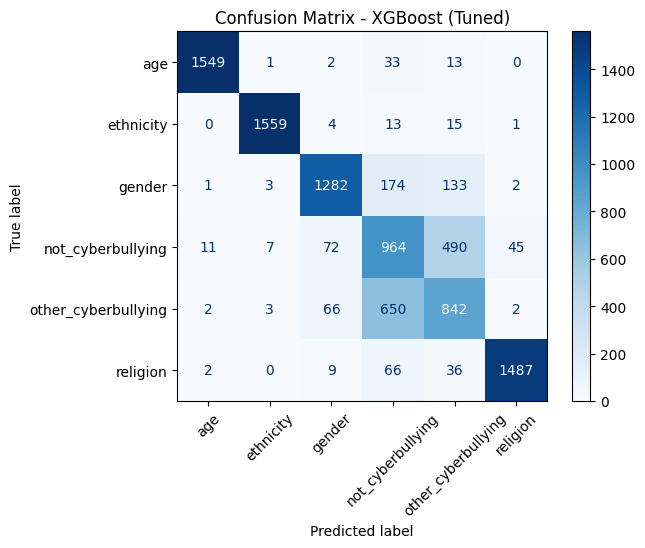


--- Gradient Boosting (Tuned) ---
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1598
          ethnicity       0.99      0.97      0.98      1592
             gender       0.90      0.79      0.84      1595
  not_cyberbullying       0.49      0.65      0.56      1589
other_cyberbullying       0.55      0.49      0.52      1565
           religion       0.97      0.92      0.95      1600

           accuracy                           0.80      9539
          macro avg       0.82      0.80      0.80      9539
       weighted avg       0.82      0.80      0.81      9539



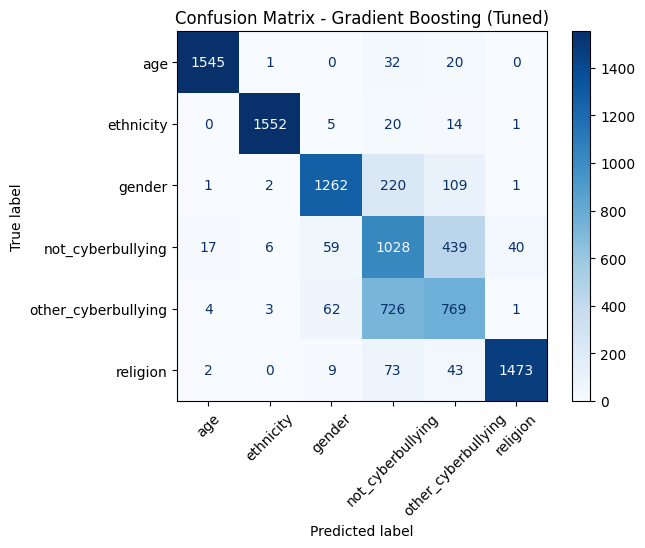

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
537/537 - 6s - 11ms/step - accuracy: 0.7620 - loss: 0.5709 - val_accuracy: 0.7977 - val_loss: 0.4449
Epoch 2/10
537/537 - 4s - 7ms/step - accuracy: 0.8062 - loss: 0.4405 - val_accuracy: 0.8045 - val_loss: 0.4389
Epoch 3/10
537/537 - 4s - 7ms/step - accuracy: 0.8182 - loss: 0.4044 - val_accuracy: 0.7959 - val_loss: 0.4457
Epoch 4/10
537/537 - 4s - 7ms/step - accuracy: 0.8304 - loss: 0.3781 - val_accuracy: 0.7987 - val_loss: 0.4472
Epoch 5/10
537/537 - 4s - 7ms/step - accuracy: 0.8426 - loss: 0.3500 - val_accuracy: 0.7985 - val_loss: 0.4630
Epoch 6/10
537/537 - 4s - 7ms/step - accuracy: 0.8516 - loss: 0.3280 - val_accuracy: 0.7969 - val_loss: 0.4935
Epoch 7/10
537/537 - 4s - 7ms/step - accuracy: 0.8651 - loss: 0.3023 - val_accuracy: 0.7830 - val_loss: 0.5172
Epoch 8/10
537/537 - 4s - 8ms/step - accuracy: 0.8727 - loss: 0.2831 - val_accuracy: 0.7762 - val_loss: 0.5392
Epoch 9/10
537/537 - 4s - 7ms/step - accuracy: 0.8793 - loss: 0.2685 - val_accuracy: 0.7867 - val_loss: 0.5705


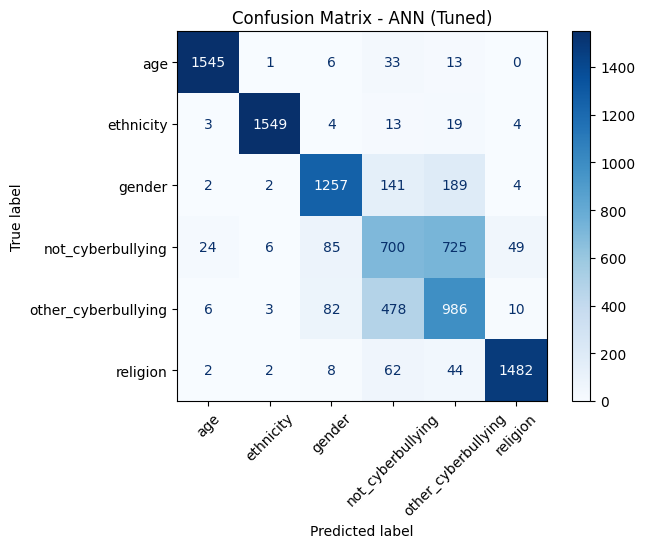

In [11]:
# 1. Random Forest (Tuned)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest (Tuned)", class_names)

# 2. XGBoost (Tuned)
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost (Tuned)", class_names)

# 3. Gradient Boosting (Tuned)
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
gb.fit(X_train, y_train)
evaluate_model(gb, X_test, y_test, "Gradient Boosting (Tuned)", class_names)

# 4. ANN (Tuned)
ann = Sequential()
ann.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dropout(0.4))
ann.add(Dense(256, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(len(class_names), activation='softmax'))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_cat, epochs=10, batch_size=64, verbose=2, validation_split=0.1)

# Predict & Evaluate ANN
y_pred_ann = np.argmax(ann.predict(X_test), axis=1)
print("\n--- ANN (Tuned) ---")
print(classification_report(y_test, y_pred_ann, target_names=class_names))
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Confusion Matrix - ANN (Tuned)')
plt.show()
